# Lisa Cohen

MCP210C take-home final exam, Dr. Calvert

June 1, 2016

In [11]:
# DRAFT - NOT FINISHED YET

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# What is the cost of consuming/metabolizing ethanol? 
***1.  Ethanol is metabolized as follows: The first step is catalyzed by the enzyme alcohol dehydrogenase (ADH) (EC 1.1.1.1) while the second step is catalyzed by aldehyde dehydrogenase (ALDH) (EC 1.2.1.3).  In the mitochondria, the acetate is converted to acetyl CoA by acetyl CoA (EC 6.2.1.1).  You know what happens to acetyl CoA if it is oxidized.***  

***a). Using a diagram, show how consumed ethanol is converted to 2 CO2 and 3 H2O (No structures just names will do)***

In [4]:
Image(filename='tca.png')
# drawn with https://www.draw.io/

***b).  Given that the enthalpy of combustion (∆cH) of ethanol is -1,370 kJ/mole, what is the energy value of an ATP produced from ethanol metabolism and is ethanol more efficient or less efficient at producing ATP than glucose?***

Step 1:
ethanol + NAD+ -> acetaldehyde + NADH + H+
[alcohol dehydrogenase (ADH) (EC 1.1.1.1)](http://equilibrator.weizmann.ac.il/reaction?reactantsId=C00003&reactantsCoeff=-1&reactantsName=NAD+&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00004&reactantsCoeff=1&reactantsName=NADH&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00084&reactantsCoeff=1&reactantsName=Acetaldehyde&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00469&reactantsCoeff=-1&reactantsName=Ethanol&reactantsPhase=aqueous&reactantsConcentration=0.001&ph=7.000000&pmg=14.000000&ionic_strength=0.100000&e_reduction_potential=0.000000&max_priority=0&mode=BA&query=NAD%2B%20%2B%20Ethanol%20%3D%20NADH%20%2B%20H%2B%20%2B%20Acetaldehyde)

Step 2:
acetaldehyde + H2O + NAD+ -> acetate + NADH + H+
[aldehyde dehydrogenase (ALDH) (EC 1.2.1.3)](http://equilibrator.weizmann.ac.il/reaction?reactantsId=C00003&reactantsCoeff=-1&reactantsName=NAD+&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00004&reactantsCoeff=1&reactantsName=NADH&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00033&reactantsCoeff=1&reactantsName=Acetate&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00084&reactantsCoeff=-1&reactantsName=Acetaldehyde&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00001&reactantsCoeff=-1&reactantsName=H2O&reactantsPhase=liquid&reactantsConcentration=1&ph=7.000000&pmg=14.000000&ionic_strength=0.100000&e_reduction_potential=0.000000&max_priority=0&mode=BA&query=H2O%20%2B%20NAD%2B%20%2B%20Acetaldehyde%20%3D%20NADH%20%2B%20Acetate%20%2B%20H%2B)

Step 3:
acetate + ATP + CoA -> 2Pi + AMP + Acetyl-CoA
[acetate thiokinase (ATK) (EC 6.2.1.1)](http://equilibrator.weizmann.ac.il/reaction?reactantsId=C00002&reactantsCoeff=-1&reactantsName=ATP&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00010&reactantsCoeff=-1&reactantsName=CoA&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00013&reactantsCoeff=1&reactantsName=Diphosphate&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00020&reactantsCoeff=1&reactantsName=AMP&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00024&reactantsCoeff=1&reactantsName=Acetyl-CoA&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00033&reactantsCoeff=-1&reactantsName=Acetate&reactantsPhase=aqueous&reactantsConcentration=0.001&ph=7.000000&pmg=14.000000&ionic_strength=0.100000&e_reduction_potential=0.000000&max_priority=0&mode=BA&query=ATP%20%2B%20CoA%20%2B%20Acetate%20%3D%20Diphosphate%20%2B%20AMP%20%2B%20Acetyl-CoA)

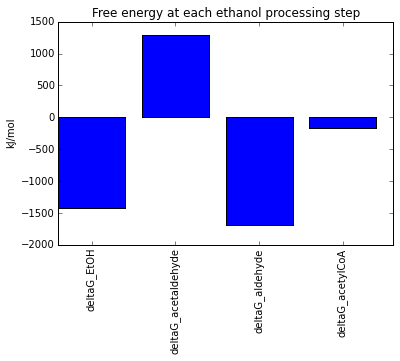

In [9]:
# Gibbs Free Energy (G)
# Energy associated with a chemical reaction 
# that can be used to do work.  
# The free energy of a system is the sum of its enthalpy (H) 
# plus the product of the temperature (Kelvin) 
# and the entropy (S) of the system:
# G = H - TS
# deltaG = sum of all (deltaG2) - (delta G1)

# deltaG_step = deltaG_2 - deltaG_1

# ethanol enthalpy combustion, assume standard molar entropy 0.1599 kJ/(mol K), 310 K
deltaH_EtOH = -1370
deltaG_EtOH = deltaH_EtOH - (310*0.1599)
# energy available to do work

# Step 1:
# acetaldehyde formation (Goldberg et al. 1993)
deltaG_acetaldehyde = -127.6
deltaG_1 = deltaG_acetaldehyde - deltaG_EtOH

# Step 2:
# acetate formation (CRC)
deltaG_acetate = -389.9
deltaG_2 = deltaG_acetate - deltaG_1

# Step 3:
# Acetyl-CoA formation
deltaG_acetylCoA = -1855.8

deltaG_formation_acetylCoA = deltaG_acetylCoA - deltaG_2

N = 4
ind = np.arange(N)
y = (deltaG_EtOH,deltaG_1,deltaG_2,deltaG_formation_acetylCoA)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('Free energy at each ethanol processing steps')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("deltaG_EtOH","deltaG_acetaldehyde","deltaG_aldehyde","deltaG_acetylCoA"),rotation = 'vertical')
plt.show()

### Glucose metabolism

C6H12O6 + 6 O2 + 32 ADP + 32 Pi -> 6CO2 + 6H2O + 32 ATP

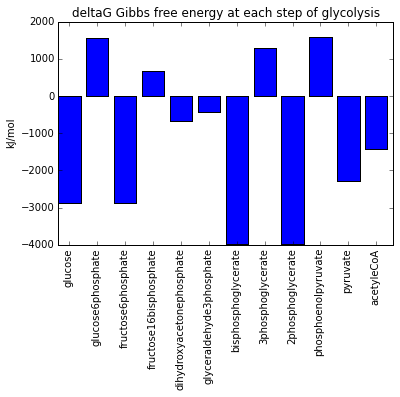

In [16]:
# assume standard molar entropy glucose 0.2092 kJ K−1 mol−1, 310 K
deltaH_glucose = -2805
deltaG_glucose = deltaH_glucose - (310*0.2092)

# Step 1:
# D-glucose + ATP -> alpha-D-glucose-6-phosphate + H+ + ADP
# hexokinase
deltaG_glucose6phosphate = -1319
deltaG_1 = deltaG_glucose6phosphate - deltaG_glucose

# Step 2:
# alpha-D-glucose-6-phosphate -> beta-D-fructose-6-phosphate
# phosphoglucoseisomerase
deltaG_fructose6phosphate = -1316
deltaG_2 = deltaG_fructose6phosphate - deltaG_1

# Step 3:
# beta-D-fructose-6-phosphate + ATP -> beta-D-fructose-1,6-bisphosphate + H+ + ADP
# phosphofructokinase
deltaG_fructose16bisphosphate = -2202
deltaG_3 = deltaG_fructose16bisphosphate - deltaG_2

# Step 4:
# beta-D-fructose-1,6-bisphosphate -> glyceraldehyde-3-phosphate + dihydroxyacetone phosphate
# fructose bisphosphate aldolase
deltaG_glyceraldehyde3phosphate = -1089.3
deltaG_dihydroxyacetonephosphate = -1094.8
deltaG_4 = deltaG_dihydroxyacetonephosphate - (deltaG_3 + deltaG_dihydroxyacetonephosphate)

# Step 5:
# dihydroxyacetone phosphate -> glyceraldehyde-3-phosphate
# triosephosphate isomerase
deltaG_glyceraldehyde3phosphate
deltaG_5 = deltaG_glyceraldehyde3phosphate - deltaG_4

# Assume following steps are multiplied by 2

# Step 6:
# glyceraldehyde-3-phosphate + NAD+ + Pi-> D-1,3-bisphosphoglycerate + NADH + H+
# glyceraldehyde phosphate dehydrogenase
deltaG_bisphosphoglycerate = -2201.9
real_deltaG_bisphosphoglycerate = 2*deltaG_bisphosphoglycerate
deltaG_6 = real_deltaG_bisphosphoglycerate - deltaG_5

# Step 7:
# D-1,3-bisphosphoglycerate + ADP -> ATP + 3-phosphoglycerate
# phosphoglycerate kinase
deltaG_3phosphoglycerate = -1348.1
real_deltaG_3phosphoglycerate = 2*deltaG_3phosphoglycerate
deltaG_7 = real_deltaG_3phosphoglycerate - deltaG_6

# Step 8:
# 3-phosphoglycerate -> 2-phosphoglycerate
# phosphoglycerate mutase
deltaG_2phosphoglycerate = -1343.9
real_deltaG_2phosphoglycerate = 2*deltaG_2phosphoglycerate
deltaG_8 = real_deltaG_2phosphoglycerate - deltaG_7

# Step 9:
# 2-phosphoglycerate -> phosphoenolpyruvate + H20
# enolase
deltaG_phosphoenolpyruvate = -1190.3
real_phosphoenolpyruvate = 2*deltaG_phosphoenolpyruvate
deltaG_9 = real_phosphoenolpyruvate - deltaG_8

# Step 10:
# phosphoenolpyruvate + ADP + H+ -> pyruvate + ATP
# pyruvate kinase
deltaG_pyruvate = -345.8
real_deltaG_pyruvate = 2*deltaG_pyruvate
deltaG_10 = real_deltaG_pyruvate - deltaG_9

# Step 11:
# pyruvate + NAD+ + CoA -> acetyl-CoA + NADH + CO2
# pyruvate dehydrogenase
deltaG_acetylCoA = -1855.8
real_deltaG_acetylCoA = 2*deltaG_acetylCoA
deltaG_11 = real_deltaG_acetylCoA - deltaG_10


N = 12
ind = np.arange(N)
y = (deltaG_glucose,deltaG_1,deltaG_2,deltaG_3,
    deltaG_4,deltaG_5,deltaG_6,deltaG_7,deltaG_8,deltaG_9,deltaG_10,deltaG_11)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('deltaG Gibbs free energy at each step of glycolysis')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("glucose","glucose6phosphate","fructose6phosphate","fructose16bisphosphate",
                    "dihydroxyacetonephosphate","glyceraldehyde3phosphate","bisphosphoglycerate",
                   "3phosphoglycerate","2phosphoglycerate","phosphoenolpyruvate","pyruvate","acetyleCoA"),rotation = 'vertical')
plt.show()


### TCA cycle

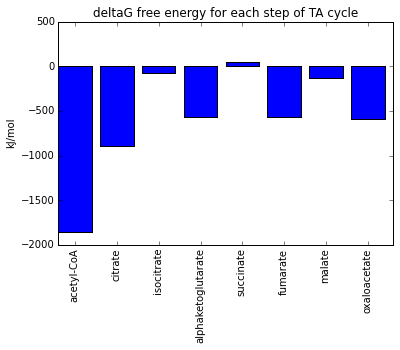

In [20]:
# actyl-CoA->citrate (citrate synthase)
# citrate->isocitrate (aka 1-Hydroxypropane-1,2,3-tricarboxylic acid) (aconitase)
# isocitrate->alpha-ketoglutarate (isocitrate dehydrogenase)
# alpha-ketoglutarate->succinyl-CoA (alphta-ketoglutarate dehydrogenase)
# succinyl-CoA->succinate (succinyl-CoA synthetase)
# succinate->fumarate (succinate dehydrogenase)
# fumarate->malate (fumarase)
# malate->oxaloacetate (malate dehydrogenase)

deltaG_acetylCoA = -1855.8
deltaG_citrate = -966
deltaG_1 = deltaG_acetylCoA - deltaG_citrate

deltaG_isocitrate = -958.4 
deltaG_2 = deltaG_isocitrate - deltaG_1

deltaG_alphaketoglutarate = -631.1
# aka 2-Oxoglutarate
deltaG_3 = deltaG_alphaketoglutarate - deltaG_2

deltaG_succinate = -518.6
deltaG_4 = deltaG_succinate - deltaG_3

deltaG_fumarate = -519.6
deltaG_5 = deltaG_fumarate - deltaG_4

deltaG_malate = -690.0
deltaG_6 = deltaG_malate - deltaG_5

deltaG_oxaloacetate = -714.5
deltaG_7 = deltaG_oxaloacetate - deltaG_6


N = 8
ind = np.arange(N)
y = (deltaG_acetylCoA,deltaG_1,deltaG_2,deltaG_3,
     deltaG_4,deltaG_5,deltaG_6,deltaG_7)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('deltaG free energy for each step of TA cycle')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("acetyl-CoA","citrate","isocitrate","alphaketoglutarate",
                    "succinate","fumarate","malate","oxaloacetate"),rotation = 'vertical')
plt.show()


Differences between EtOH and glucose metabolism include number of carbons input. Ethanol is a 2 carbon molecule vs. glucose which has 6 carbons. 

Glucose (m.w. = 180.2 g/mol) -> 2 pyruvate -> acetyl-CoA

Ethanol (m.w. = 46.1 g/mol -> acetate -> acetyl-CoA

Overall, same ATP will come from from TCA per mol of acetyl-CoA. However, glycolysis will extract twice as much acetyl-CoA from glucose.

### References
    
CRC Handbook of Chemistry and Physices, 96th Edition (2015-2016)
Section 5: Thermochemistry, Electrochemistry, and Solution Chemistry
Thermodynamic Properties of Chemical Substances
[http://www.hbcpnetbase.com/]

Miller and Smith-Magowan. 1990. The Thermodynamics of the Krebs Cycle and Related Compounds. 
J. Phys. Chem. Ref. Data, Vol. 19(4)
[http://www.nist.gov/srd/upload/jpcrd394.pdf]

Goldgerg et al. 1993. Thermodynamics of Enzyme-Catalyzed Reactions: Part 1. Oxidoreductases. J. Phys. Chem. Ref. Data, Vol. 22(2).
[http://www.nist.gov/srd/upload/jpcrd453.pdf]

Flamholz et al. 2011 eQuilibrator - the biochemical thermodynamics calculator. Nucleic Acids Research. [doi: 10.1093/nar/gkr874](http://nar.oxfordjournals.org/content/early/2011/11/07/nar.gkr874.full) Available at: [http://equilibrator.weizmann.ac.il/]

Garrett & Grisham. Biochemistry, 2nd Edition. 1999. Hartcourt Brace College Publishers.


*** 2.) The microsomal ethanol oxidizing system (MEOS) is an alternate pathway of ethanol metabolism.  This pathway plays a minor role in ethanol metabolism in average individuals, but increases after chronic alcohol consumption. The MEOS pathway requires the CYP2E1 enzyme, which is a member of the cytochrome P450 mixed-function oxidase system and is involved in the metabolism of xenobiotics.  Ethanol’s affinity for CYP2E1 is lower than its affinity for ADH.  An increase in MEOS activity is correlated to an increase in production of CYP2E1.***  

*** a). Use MEOS to your diagram in question 1 part a and answer question 1 part b using the MEOS system for ethanol oxidation. *** 

***b) Based on what we did in class with glucose, which method of producing ATP (ADH or MEOS) is the most efficient and why and justify your answer (should be short).***

***3.  Is there an evolutionary advantage to having MEOS more active in chronic alcoholics and what might the consequence relative to energy metabolism?***

If it allows chronic alcoholics to successfully reproduce, then an evolutionary consequence is conferred. Given a selection event where people are forced to drink only EtOH there could be an advantage for MEOS. In this case, ethanol metabolism may contribute to survival and successful reproduction.

***4.) And finally, we have asked which is more efficient at producing ATP, substrate level phosphorylation or oxidative phosphorylation. You now have enough data to estimate the efficiency of each. We know that the heat of combustion for one mole of starch is 2,820 kJ/mole. The heat of combustion of pyruvate is 1062 kJ/mole. The heat of combustion of lactate is 1,333 kJ/mole. Calculate the energy value for a mole of ATP turnover when the ATP is produced by substrate level phosphorylation in glycolysis as compared to using the NADH + H+ produced in anaerobic glycolysis. State any assumptions that you have made in and tell which is more efficient.  Can you suggest why one method might be more efficient for the production of ATP as compared to another method? ***